# Multiple Linear Regression

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns

In [3]:
data_fuel=pd.read_csv('datasets/FuelConsumptionCo2.csv')
data_fuel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [5]:
mldf=data_fuel[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
mldf

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
...,...,...,...,...,...,...
1062,3.0,6,13.4,9.8,11.8,271
1063,3.2,6,13.2,9.5,11.5,264
1064,3.0,6,13.4,9.8,11.8,271
1065,3.2,6,12.9,9.3,11.3,260


<Axes: xlabel='ENGINESIZE', ylabel='CO2EMISSIONS'>

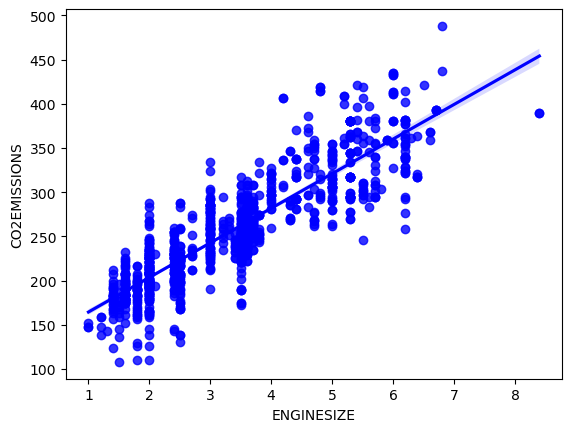

In [7]:
sns.regplot(mldf,x='ENGINESIZE',y='CO2EMISSIONS',color='blue')

# Multiple Regression Model

In [9]:
from sklearn.linear_model import LinearRegression

In [14]:
model=LinearRegression()
model

LinearRegression()

In [34]:
msk=np.random.rand(len(data_fuel))<0.8
train=data_fuel[msk]
test=data_fuel[~msk]
train.shape,test.shape

((855, 13), (212, 13))

In [35]:
x=train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']]
y=train['CO2EMISSIONS']
x_test=test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']]
y_test=test['CO2EMISSIONS']
model.fit(x,y)

LinearRegression()

In [36]:
model.coef_,model.intercept_

(array([11.32010785,  7.20473995,  9.44708385]), 66.6708582651957)

In [37]:
y_hat=model.predict(x_test)
print(f'Mean Squared error: {np.mean((y_hat-y_test)**2)}')
print(f'variance score: {model.score(x,y)}')

Mean Squared error: 523.931540461811
variance score: 0.8601614386050916


In [41]:
x_train=train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']]
y_train=train['CO2EMISSIONS']
x_test=test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']]
y_test=test['CO2EMISSIONS']
model1=LinearRegression()
model1.fit(x_train,y_train)

LinearRegression()

In [42]:
model1.coef_

array([11.36565419,  6.8358986 ,  6.20696671,  2.91791312])

In [44]:
yhat=model1.predict(x_test)
print(f'Mean Squared Error: {np.mean((yhat-y_test)**2)}')
print(f'Variance score: {model1.score(x_test,y_test)}')

Mean Squared Error: 525.7686023376901
Variance score: 0.8770801313667519
